Jaiden Hausler
801053745
Homework 1

In [1]:
import torch
import glob
import pandas as pd
import numpy as np
from torchvision import transforms
from PIL import Image

Import images

In [2]:
image_list = []
for filename in glob.glob("/content/drive/MyDrive/Colab Notebooks/Homework 1/hw1_data/*.jpg"):
    img = Image.open(filename)
    image_list.append(img)

Convert images to tensor

In [3]:
tensor_list = []
convert_tensor = transforms.ToTensor()
for image in image_list:
  img_t = convert_tensor(image)
  tensor_list.append(img_t)

Mean of each image tensor to see brightness

In [4]:
brightness_list = []
for tensors in tensor_list:
  mean = tensors.mean()
  brightness_list.append(mean)

brightness_list

[tensor(0.3808),
 tensor(0.3036),
 tensor(0.2544),
 tensor(0.4872),
 tensor(0.4349),
 tensor(0.3196)]

Mean of each color channel for each image tensor

In [5]:
R_mean, G_mean, B_mean = [], [], []

for tensors in tensor_list:
  Red, Green, Blue = tensors.mean(dim = [1,2])
  R_mean.append(Red)
  G_mean.append(Green)
  B_mean.append(Blue)
print(R_mean)
print(G_mean)
print(B_mean)

[tensor(0.5553), tensor(0.2655), tensor(0.1864), tensor(0.5750), tensor(0.6579), tensor(0.2467)]
[tensor(0.2779), tensor(0.2973), tensor(0.3007), tensor(0.6255), tensor(0.3518), tensor(0.6766)]
[tensor(0.3092), tensor(0.3480), tensor(0.2761), tensor(0.2610), tensor(0.2950), tensor(0.0355)]


PROBLEM 2

Import data and convert to tensor

In [6]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Functions for model, loss, and gradient descent

In [7]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [8]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [9]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)  # <1>
    return dsq_diffs

In [10]:
def dmodel_dw1(t_u, w1, w2, b):
    return t_u

In [11]:
def dmodel_dw2(t_u, w1, w2, b):
    return 2 * t_u * w2

In [12]:
def dmodel_db(t_u, w1, w2, b):
    return 1.0

In [13]:
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])  # <1>

Training function

In [14]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params

        t_p = model(t_u, w1, w2, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)


        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

Normalize Data

In [15]:
t_un = 0.1 * t_u

Training, learning rate = 0.1

In [16]:
params1 = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.1, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params1

Epoch 1, Loss 675.794373


tensor([3.9767e+28,       -inf, 6.5463e+27])

Training, learning rate = 0.01

In [17]:
params2 = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.01, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params2

Epoch 1, Loss 675.794373


tensor([3.2558e+24,       -inf, 5.3595e+23])

Training, learning rate = 0.001

In [18]:
params3 = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.001, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params3

Epoch 1, Loss 675.794373
Epoch 500, Loss 9.146698
Epoch 1000, Loss 7.500380
Epoch 1500, Loss 6.244924
Epoch 2000, Loss 5.289833
Epoch 2500, Loss 4.564873
Epoch 3000, Loss 4.015790
Epoch 3500, Loss 3.600818
Epoch 4000, Loss 3.287913
Epoch 4500, Loss 3.052536
Epoch 5000, Loss 2.875952


tensor([ 0.6939,  0.4119, -4.9775])

Training, learning rate = 0.0001

In [19]:
params4 = training_loop(
    n_epochs = 5000, 
    learning_rate = 0.0001, 
    params = torch.tensor([1.0, 1.0, 0.0]), 
    t_u = t_un, 
    t_c = t_c,
    print_params = False)

params4

Epoch 1, Loss 675.794373
Epoch 500, Loss 10.335206
Epoch 1000, Loss 10.118582
Epoch 1500, Loss 9.907690
Epoch 2000, Loss 9.702376
Epoch 2500, Loss 9.502537
Epoch 3000, Loss 9.307964
Epoch 3500, Loss 9.118608
Epoch 4000, Loss 8.934264
Epoch 4500, Loss 8.754838
Epoch 5000, Loss 8.580196


tensor([ 0.4565,  0.3325, -0.8956])

Plot input data with non-linear model

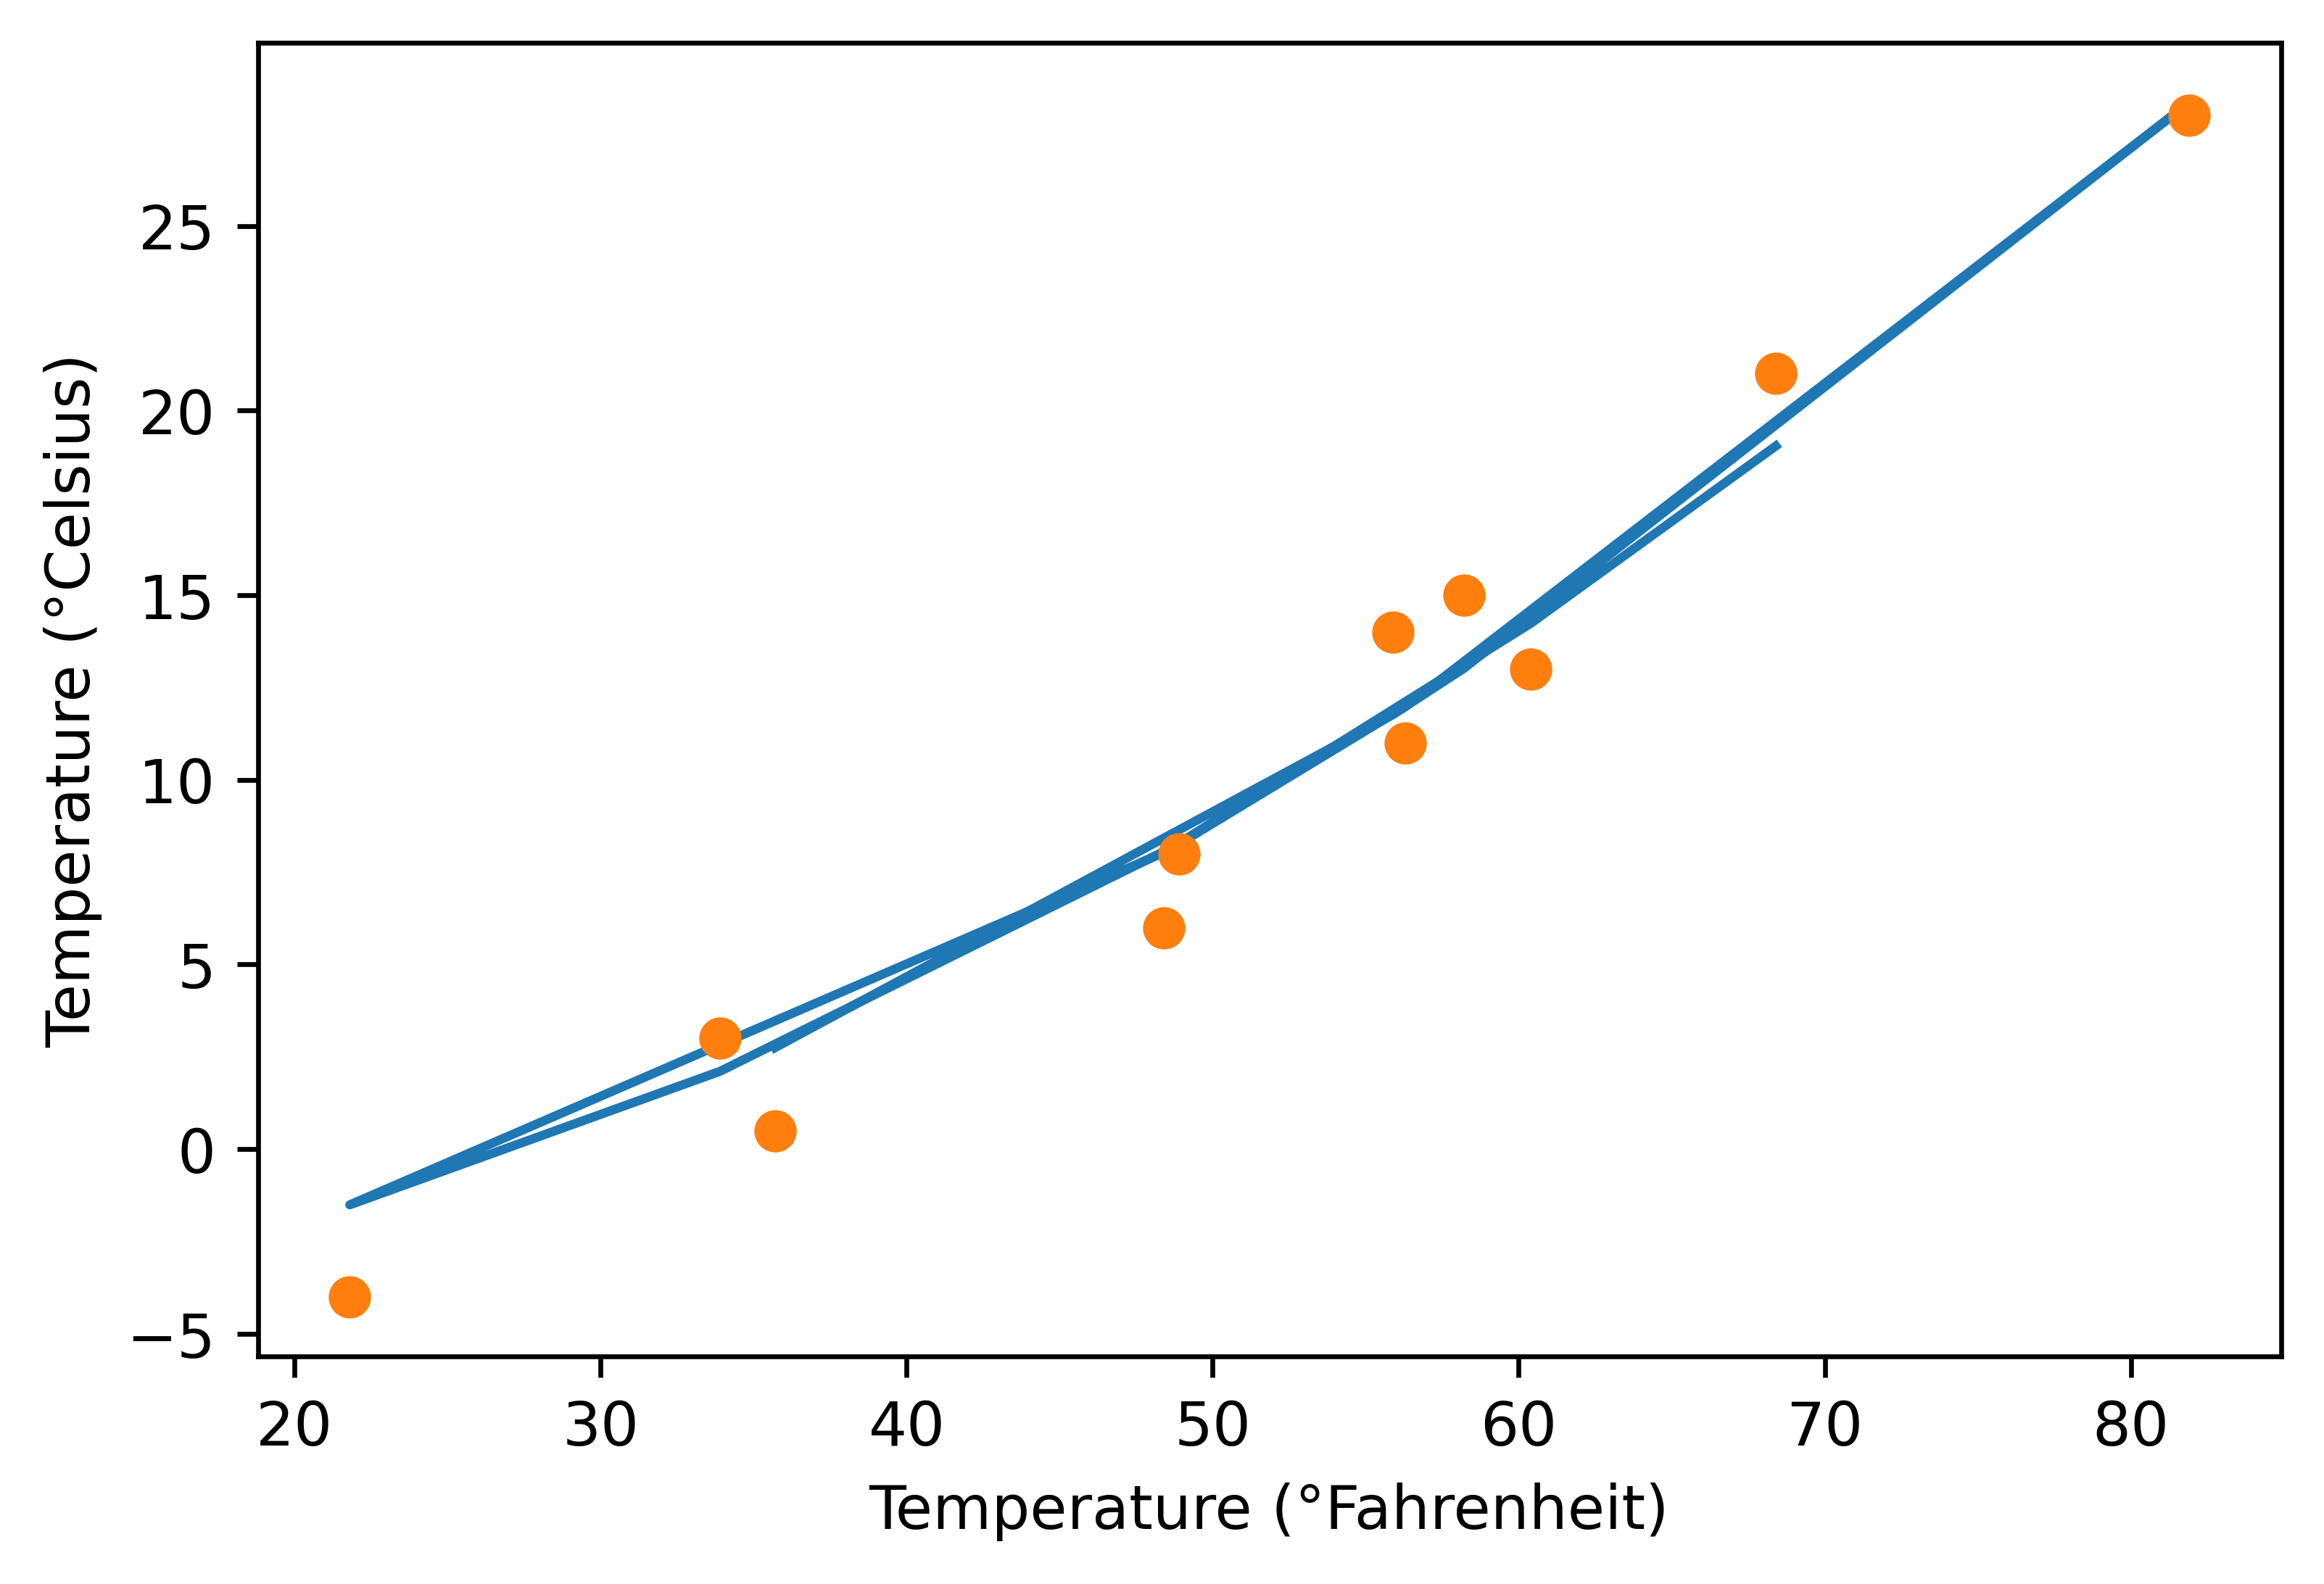

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params3)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

**PROBLEM 3**

Import housing dataset

In [21]:
housing = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Homework 1/hw1_data/Housing.csv"))

Model, loss, and gradient descent functions

In [22]:
def model2(train, w1, w2, w3, w4, w5, b):
    return w5*train[:, 4] + w4*train[:, 3] + w3*train[:, 2] + w2*train[:, 1] + w1*train[:, 0] + b

In [23]:
def dmodel2_dw1(train, w1, w2, w3, w4, w5, b):
    return train[:, 0];

In [24]:
def dmodel2_dw2(train, w1, w2, w3, w4, w5, b):
    return train[:, 1]

In [25]:
def dmodel2_dw3(train, w1, w2, w3, w4, w5, b):
    return train[:, 2]

In [26]:
def dmodel2_dw4(train, w1, w2, w3, w4, w5, b):
    return train[:, 3]

In [27]:
def dmodel2_dw5(train, w1, w2, w3, w4, w5, b):
    return train[:, 4]

In [28]:
def dmodel2_db(train, w1, w2, w3, w4, w5, b):
    return 1.0

In [29]:
def grad_fn2(train, ytrain, predict, w1, w2, w3, w4, w5, b):
    dloss_dtp = dloss_fn(predict, ytrain)
    dloss_dw1 = dloss_dtp * dmodel2_dw1(train, w1, w2, w3, w4, w5, b)
    dloss_dw2 = dloss_dtp * dmodel2_dw2(train, w1, w2, w3, w4, w5, b)
    dloss_dw3 = dloss_dtp * dmodel2_dw3(train, w1, w2, w3, w4, w5, b)
    dloss_dw4 = dloss_dtp * dmodel2_dw4(train, w1, w2, w3, w4, w5, b)
    dloss_dw5 = dloss_dtp * dmodel2_dw5(train, w1, w2, w3, w4, w5, b)
    dloss_db = dloss_dtp * dmodel2_db(train, w1, w2, w3, w4, w5, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])  # <1>

Training loop

In [30]:
def training_loop(n_epochs, learning_rate, params, train, ytrain,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params

        predict = model2(train, w1, w2, w3, w4, w5, b)  # <1>
        loss = loss_fn(predict, ytrain)
        grad = grad_fn2(train, ytrain, predict, w1, w2, w3, w4, w5, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

Normalize Data

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
newHousing = housing[num_vars].to_numpy()
newHousing_normalized = scaler.fit_transform(housing[num_vars])
Y = newHousing[:, 0]
X = newHousing_normalized[:, [1, 2, 3, 4, 5]]

Training, learning rate = 0.1

In [32]:
params2_1 = training_loop(
n_epochs = 5000,
learning_rate = .1,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
train = X,
ytrain = Y, print_params = False)

params2_1

Epoch 1, Loss 26213819324673.937500
Epoch 500, Loss 1539925793461.789551
Epoch 1000, Loss 1531275034488.799072
Epoch 1500, Loss 1531018951263.520996
Epoch 2000, Loss 1531009053667.864990
Epoch 2500, Loss 1531008589627.660889
Epoch 3000, Loss 1531008564302.793457
Epoch 3500, Loss 1531008562773.092285
Epoch 4000, Loss 1531008562675.290527
Epoch 4500, Loss 1531008562668.857910
Epoch 5000, Loss 1531008562668.428955


tensor([4817730.5284,  839050.2379, 3401219.8738, 1643819.2632, 1132788.8444,
        2250095.4132], dtype=torch.float64)

Training, learning rate = 0.01

In [33]:
params2_2 = training_loop(
n_epochs = 5000,
learning_rate = .01,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
train = X,
ytrain = Y, print_params = False)

params2_2

Epoch 1, Loss 26213819324673.937500
Epoch 500, Loss 1906700651827.963867
Epoch 1000, Loss 1746638658836.551758
Epoch 1500, Loss 1667681491670.865479
Epoch 2000, Loss 1620988367800.984863
Epoch 2500, Loss 1591195435599.615234
Epoch 3000, Loss 1571619737164.182129
Epoch 3500, Loss 1558586912044.091797
Epoch 4000, Loss 1549840686104.617676
Epoch 4500, Loss 1543934249326.961426
Epoch 5000, Loss 1539923075148.418457


tensor([4238484.6443, 1129800.8025, 3162247.0337, 1654863.8182, 1274354.5573,
        2263114.4388], dtype=torch.float64)

Training, learning rate = 0.001

In [34]:
params2_3 = training_loop(
n_epochs = 5000,
learning_rate = .001,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
train = X,
ytrain = Y, print_params = False)

params2_3

Epoch 1, Loss 26213819324673.937500
Epoch 500, Loss 3828987988933.442383
Epoch 1000, Loss 2313350321507.230469
Epoch 1500, Loss 2163776416806.220215
Epoch 2000, Loss 2108528511498.767334
Epoch 2500, Loss 2064490133360.214111
Epoch 3000, Loss 2025592817690.334473
Epoch 3500, Loss 1990854338795.539795
Epoch 4000, Loss 1959706453407.874756
Epoch 4500, Loss 1931680010698.684814
Epoch 5000, Loss 1906373937214.654541


tensor([1635552.6921, 1479380.8165, 1199071.9711, 1561721.8976, 1428860.4190,
        2967774.5155], dtype=torch.float64)

Training, learning rate = 0.0001

In [35]:
params2_4 = training_loop(
n_epochs = 5000,
learning_rate = .0001,
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0]),
train = X,
ytrain = Y, print_params = False)

params2_4

Epoch 1, Loss 26213819324673.937500
Epoch 500, Loss 20506531249750.640625
Epoch 1000, Loss 16152949571556.701172
Epoch 1500, Loss 12839190210236.115234
Epoch 2000, Loss 10316516295777.453125
Epoch 2500, Loss 8395696406898.704102
Epoch 3000, Loss 6932768979689.250977
Epoch 3500, Loss 5818212322512.465820
Epoch 4000, Loss 4968705507807.325195
Epoch 4500, Loss 4320860320610.397461
Epoch 5000, Loss 3826452724325.155273


tensor([ 744487.2206, 1079526.2645,  380187.0498,  854595.2327,  747702.0364,
        2564581.6026], dtype=torch.float64)

Plot housing actual vs predicted 

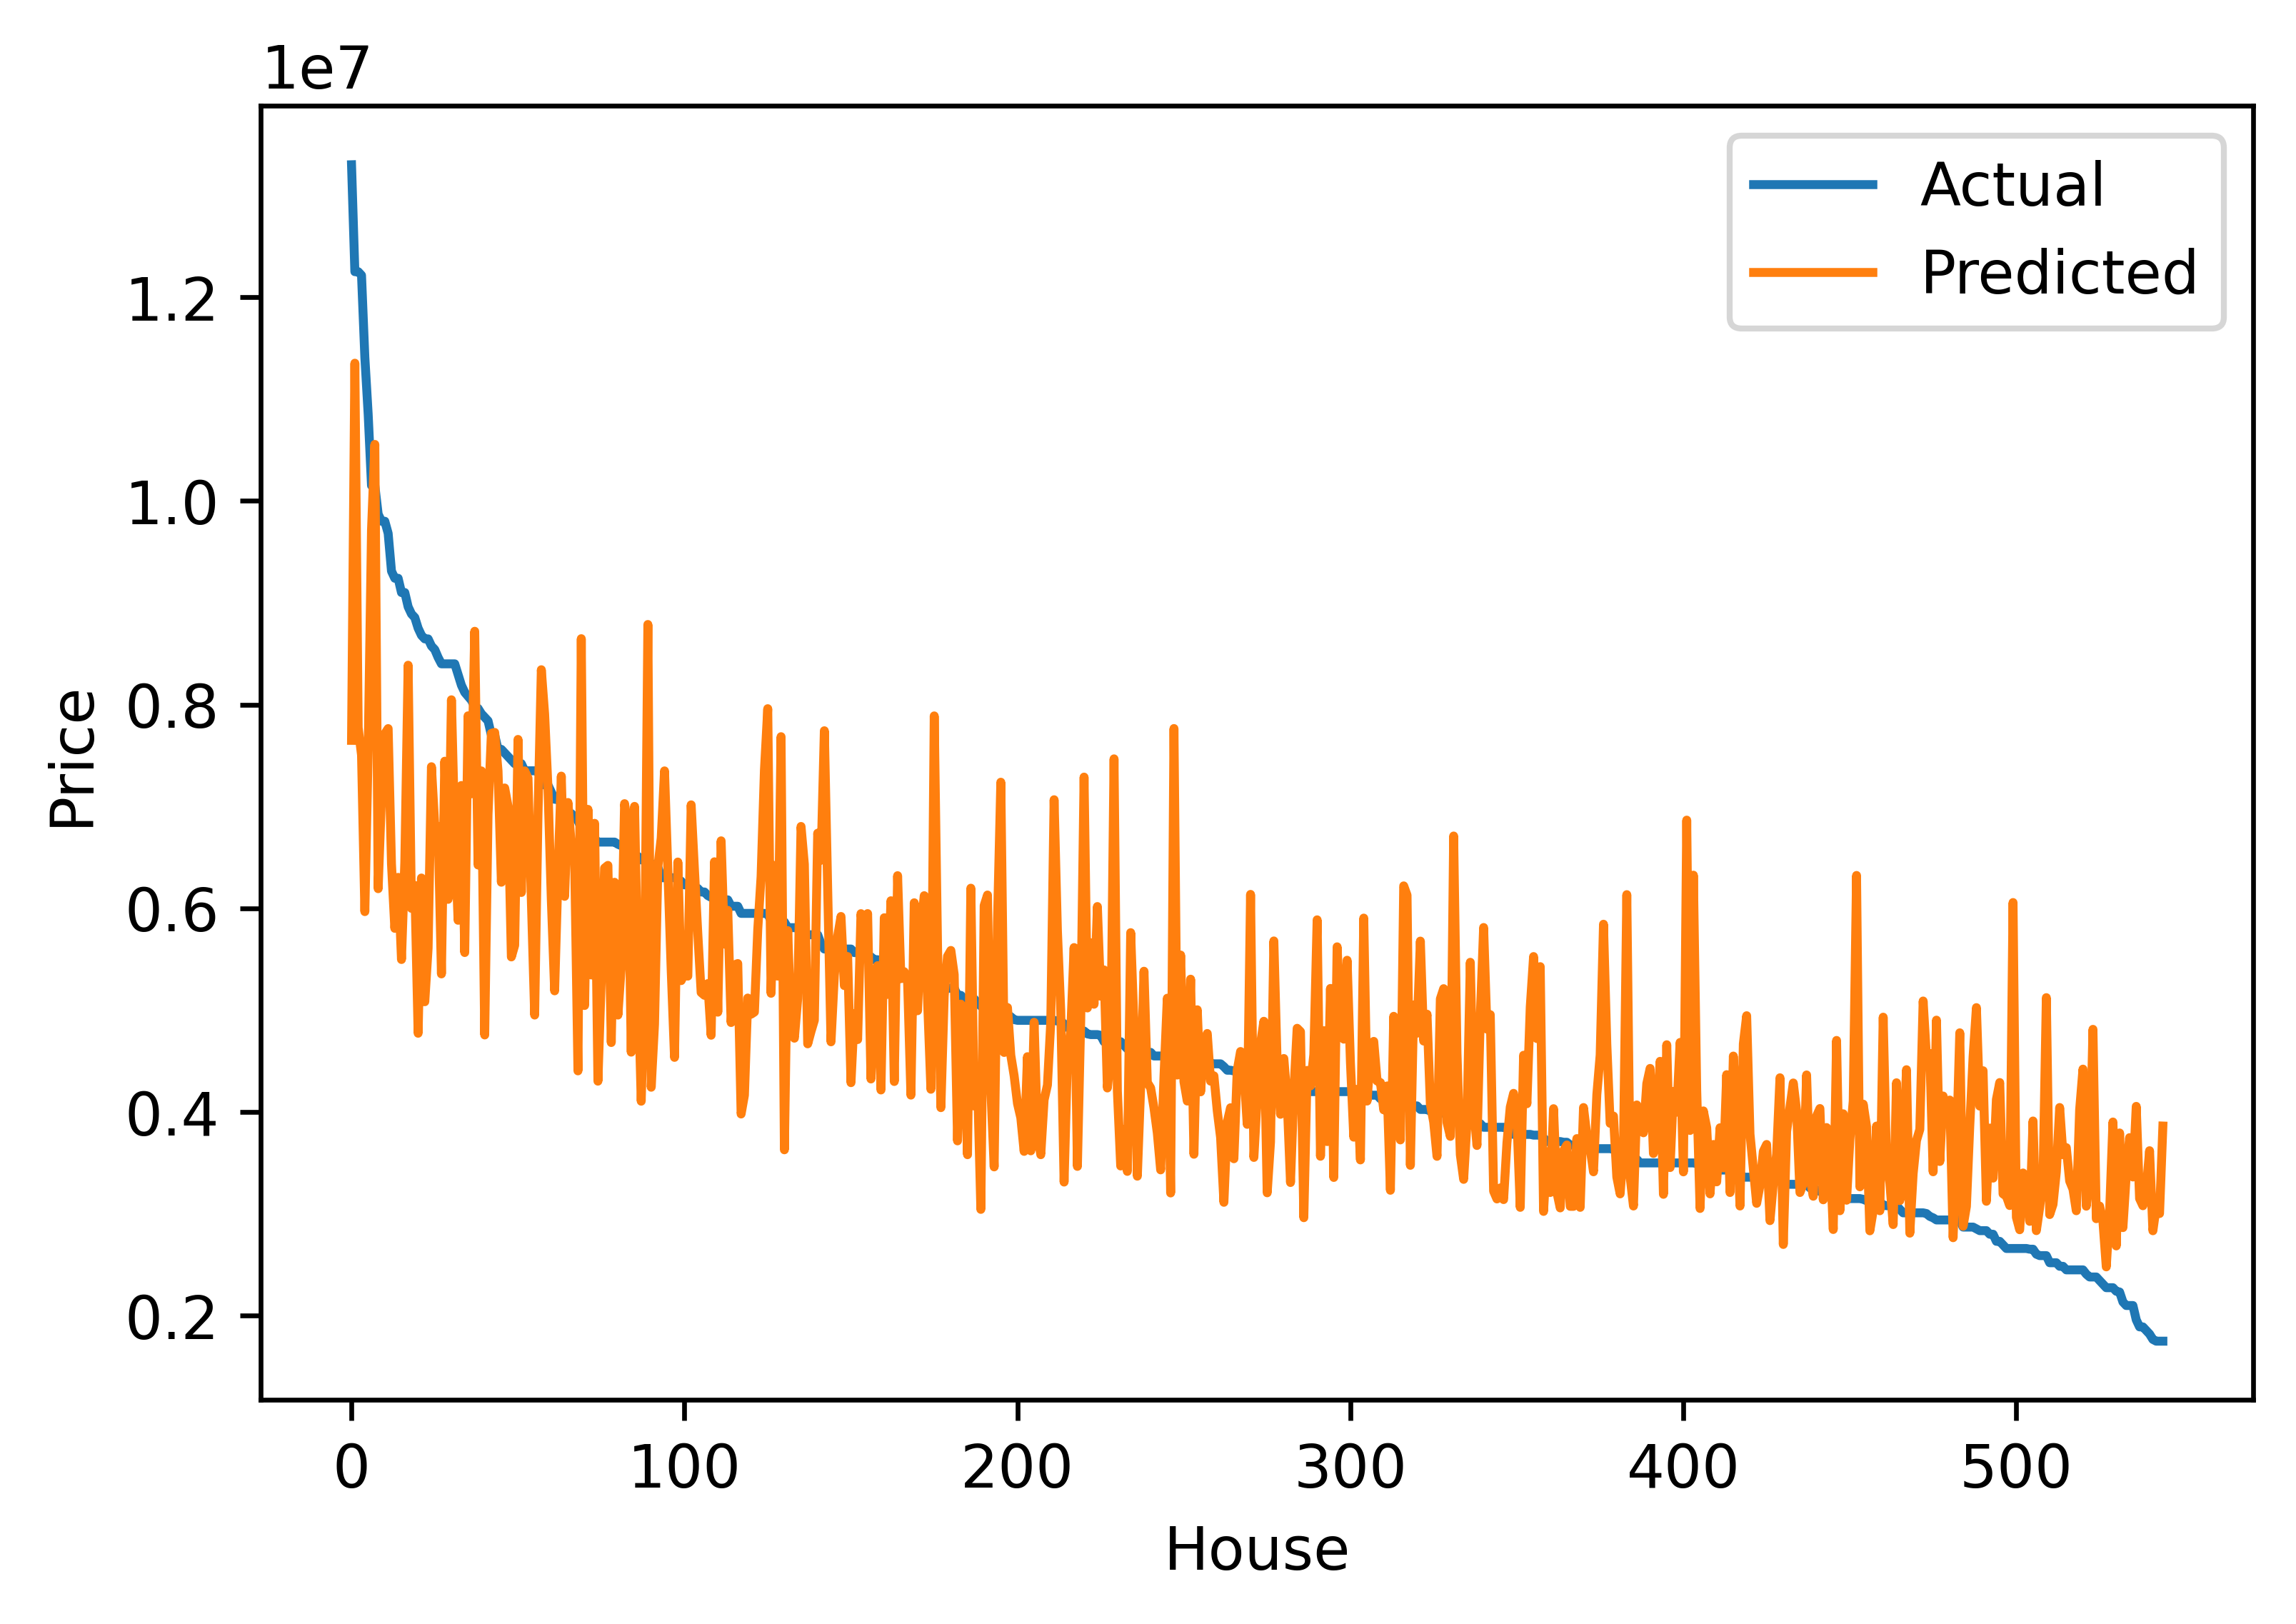

In [36]:
predict = model2(X, *params2_1)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("House")
plt.ylabel("Price")
plt.plot(Y, label = 'Actual') # <2>
plt.plot(predict, label = 'Predicted')
plt.legend()